In [2]:
import pandas as pd

In [6]:
df1 = pd.read_csv('./mov_info.csv', index_col=False)

In [15]:
df2 = pd.read_csv('./result2.csv', index_col=False)

In [16]:
df2['genre2'] = 0

In [17]:
df2

,title,grade,genre,people,genre2
0,10억,6.26,"모험, 스릴러",433866,0
1,18: 우리들의 성장 느와르,9.63,"느와르, 드라마",1124,0
2,1987,9.31,드라마,7232387,0
3,"1991, 봄",9.29,다큐멘터리,6106,0
4,"1999, 면회",8.67,드라마,3405,0
...,...,...,...,...,...
796,M,5.95,"미스터리, 멜로/로맨스",428717,0
797,O양의 아파트,10.00,드라마,"281,726",0
798,R2B: 리턴 투 베이스,7.50,"액션, 드라마",1201944,0
799,S 다이어리,5.42,코미디,1098583,0


In [20]:
for i in range(len(df1)):
    for j in range(len(df2)):
        if df1['title'][i] == df2['title'][j]:
            df2['genre2'][j] = df1['genre2'][i]

In [21]:
df2

,title,grade,genre,people,genre2
0,10억,6.26,"모험, 스릴러",433866,모험
1,18: 우리들의 성장 느와르,9.63,"느와르, 드라마",1124,느와르
2,1987,9.31,드라마,7232387,드라마
3,"1991, 봄",9.29,다큐멘터리,6106,다큐멘터리
4,"1999, 면회",8.67,드라마,3405,드라마
...,...,...,...,...,...
796,M,5.95,"미스터리, 멜로/로맨스",428717,미스터리
797,O양의 아파트,10.00,드라마,"281,726",드라마
798,R2B: 리턴 투 베이스,7.50,"액션, 드라마",1201944,액션
799,S 다이어리,5.42,코미디,1098583,코미디


In [22]:
df2.to_csv('./result3.csv', index=False, encoding='utf-8-sig')

In [109]:
df = pd.read_csv('./result3.csv', index_col=False)
dfd = pd.read_csv('./result.csv', index_col=False)

In [46]:
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
# font_location = '/usr/share/fonts/truetype/nanum/NanumGothicOTF.ttf'
font_location = 'C:/Windows/Fonts/NanumGothicCoding.ttf' # For Windows
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

%matplotlib inline




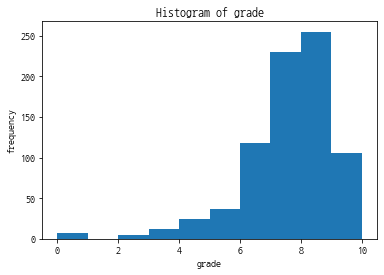

In [50]:
plt.hist(df['grade'])
plt.xlabel('grade')
plt.ylabel('frequency')
plt.title('Histogram of grade')
#plt.show()

plt.savefig('./image/hist_grade.png')

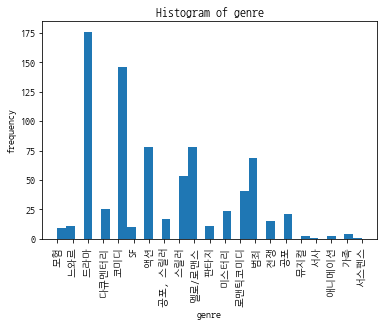

In [91]:
plt.hist(df['genre2'], bins=35)
plt.xlabel('genre')
plt.xticks(rotation=90)
plt.ylabel('frequency')
plt.title('Histogram of genre')
#plt.show()
plt.savefig('./image/hist_genre.png')

In [110]:
for i in range(len(df)):
    if ',' in df['people'][i]:
        df['people'][i] = int(df['people'][i].replace(',',''))
    else:
        df['people'][i] = int(df['people'][i])

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794 entries, 0 to 793
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   794 non-null    object 
 1   grade   794 non-null    float64
 2   genre   794 non-null    object 
 3   people  794 non-null    object 
 4   genre2  794 non-null    object 
dtypes: float64(1), object(4)
memory usage: 31.1+ KB


In [112]:
df[['genre2','people']]
genre_peo = df[['genre2','people']].groupby('genre2').sum()
genre_peo.sort_values('people').plot.barh()

,genre2,people
0,모험,433866
1,느와르,1124
2,드라마,7232387
3,다큐멘터리,6106
4,드라마,3405
...,...,...
789,미스터리,428717
790,드라마,281726
791,액션,1201944
792,코미디,1098583


In [155]:
df[['genre2','grade']]
genre_gra = df[['genre2','grade']].groupby('genre2').mean()
genre_gra.sort_values('grade').plot.barh()

,genre2,grade
0,모험,6.26
1,느와르,9.63
2,드라마,9.31
3,다큐멘터리,9.29
4,드라마,8.67
...,...,...
789,미스터리,5.95
790,드라마,10.00
791,액션,7.50
792,코미디,5.42


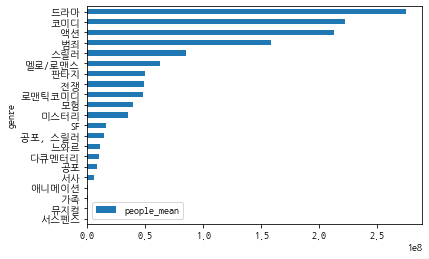

In [246]:
genre_list = list(set(df['genre2']))
df_gen_peo = pd.DataFrame(columns=['genre','people_mean'])
for i in genre_list:
    temp_list = []
    temp_list.append(i)
    temp_list.append(genre_peo['people'][i])
    a_s = pd.Series(temp_list, index=df_gen_peo.columns)
    df_gen_peo = df_gen_peo.append(a_s,ignore_index=True)

df_gen_peo.index = df_gen_peo.genre
df_gen_peo.drop('genre',axis=1)
df_gen_peo.sort_values('people_mean').plot.barh()

In [244]:
genre_gra['grade']

genre2
SF         7.111000
가족         8.342500
공포         6.176667
공포, 스릴러    6.177647
느와르        7.522727
다큐멘터리      8.821600
드라마        7.968750
로맨틱코미디     7.186585
멜로/로맨스     7.498718
모험         7.521111
뮤지컬        6.785000
미스터리       7.475000
범죄         7.783333
서사         8.720000
서스펜스       6.400000
스릴러        7.383396
애니메이션      7.880000
액션         7.727564
전쟁         8.274000
코미디        7.291164
판타지        7.800909
Name: grade, dtype: float64

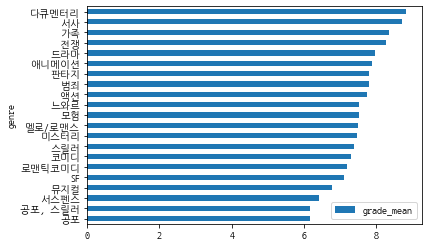

In [245]:
genre_list = list(set(df['genre2']))
df_gen_gra = pd.DataFrame(columns=['genre','grade_mean'])
for i in genre_list:
    temp_list = []
    temp_list.append(i)
    temp_list.append(genre_gra['grade'][i])
    a_s2 = pd.Series(temp_list, index=df_gen_gra.columns)
    df_gen_gra = df_gen_gra.append(a_s2,ignore_index=True)

df_gen_gra.index = df_gen_gra.genre
df_gen_gra.drop('genre',axis=1)
df_gen_gra.sort_values('grade_mean').plot.barh()

In [247]:
dfd

,title,act1,act2,act3,act4,act5
0,10억,박해일,박희순,신민아,이민기,정유미
1,18: 우리들의 성장 느와르,이재응,차엽,이익준,사현진,배유람
2,1987,김윤석,하정우,유해진,김태리,박희순
3,"1999, 면회",김창환,심희섭,안재홍,김꽃비,최재현
4,1급기밀,김상경,김옥빈,최무성,최귀화,김병철
...,...,...,...,...,...,...
769,H,염정아,지진희,조승우,성지루,권혁풍
770,M,강동원,이연희,공효진,전무송,송영창
771,R2B: 리턴 투 베이스,비,유준상,신세경,김성수,이하나
772,S 다이어리,김선아,이현우,김수로,공유,나문희


In [249]:
list_1 = list(dfd['act1'])
list_2 = list(dfd['act2'])
list_3 = list(dfd['act3'])
list_4 = list(dfd['act4'])
list_5 = list(dfd['act5'])

In [250]:
list_1 = list_1 + list_2 + list_3 + list_4 + list_5

In [252]:
list_1

import collections

In [258]:
collections.Counter(list_1)

13

In [290]:
act_list = list(set(list_1))

In [291]:
act_df = pd.DataFrame(columns=['act','count'])
for i in act_list:
    temp_list = []
    temp_list.append(i)
    temp_list.append(collections.Counter(list_1)[i])
    a_s_a = pd.Series(temp_list, index=act_df.columns)
    act_df = act_df.append(a_s_a, ignore_index=True)

In [292]:
for i in range(len(act_df)):
    if act_df['count'][i] < 10:
        act_df.drop([i], axis=0, inplace=True)
plt.rcParams["figure.figsize"] = [15, 8]
act_df.index = act_df.act
act_df.drop('act',axis=1)
act_df.sort_values(by='count').tail(30).plot.barh()

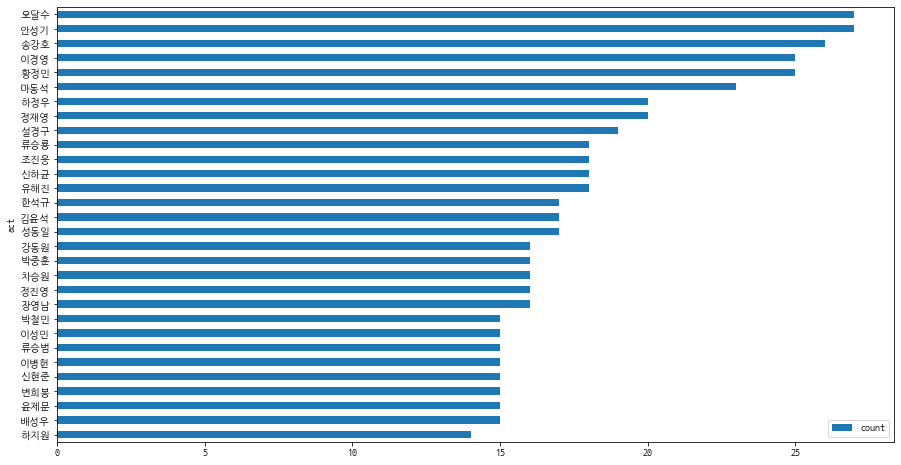

In [359]:
act_df.sort_values(by='count').tail(30).plot.barh()

In [307]:
dfdf = pd.DataFrame(columns=['title','act'])

In [310]:
for i in range(len(dfd)):
    temp_list = []
    temp_list.append(dfd['title'][i])
    temp_list.append(dfd['act1'][i])
    a_s_a_t = pd.Series(temp_list, index=dfdf.columns)
    dfdf = dfdf.append(a_s_a_t, ignore_index=True)
    temp_list = []
    temp_list.append(dfd['title'][i])
    temp_list.append(dfd['act2'][i])
    a_s_a_t = pd.Series(temp_list, index=dfdf.columns)
    dfdf = dfdf.append(a_s_a_t, ignore_index=True)
    temp_list = []
    temp_list.append(dfd['title'][i])
    temp_list.append(dfd['act3'][i])
    a_s_a_t = pd.Series(temp_list, index=dfdf.columns)
    dfdf = dfdf.append(a_s_a_t, ignore_index=True)
    temp_list = []
    temp_list.append(dfd['title'][i])
    temp_list.append(dfd['act4'][i])
    a_s_a_t = pd.Series(temp_list, index=dfdf.columns)
    dfdf = dfdf.append(a_s_a_t, ignore_index=True)
    temp_list = []
    temp_list.append(dfd['title'][i])
    temp_list.append(dfd['act5'][i])
    a_s_a_t = pd.Series(temp_list, index=dfdf.columns)
    dfdf = dfdf.append(a_s_a_t, ignore_index=True)
    

In [313]:
merge_act = pd.merge(dfdf,df, 'left',on='title')

In [317]:
merge_act

,title,act,grade,genre,people,genre2
0,10억,박해일,6.26,"모험, 스릴러",433866,모험
1,10억,박희순,6.26,"모험, 스릴러",433866,모험
2,10억,신민아,6.26,"모험, 스릴러",433866,모험
3,10억,이민기,6.26,"모험, 스릴러",433866,모험
4,10억,정유미,6.26,"모험, 스릴러",433866,모험
...,...,...,...,...,...,...
3885,YMCA 야구단,송강호,7.16,"코미디, 드라마",560000,코미디
3886,YMCA 야구단,김혜수,7.16,"코미디, 드라마",560000,코미디
3887,YMCA 야구단,김주혁,7.16,"코미디, 드라마",560000,코미디
3888,YMCA 야구단,황정민,7.16,"코미디, 드라마",560000,코미디


In [318]:
merge_act[['act','people']]

,act,people
0,박해일,433866
1,박희순,433866
2,신민아,433866
3,이민기,433866
4,정유미,433866
...,...,...
3885,송강호,560000
3886,김혜수,560000
3887,김주혁,560000
3888,황정민,560000


In [348]:
act_peo_df = pd.DataFrame(columns=['act','people_mean'])

In [349]:
for i in act_list:
    temp_list = []
    temp_list.append(i)
    temp_list.append(merge_act[['act','people']].groupby('act').sum()['people'][i])
    a_s_a = pd.Series(temp_list, index=act_peo_df.columns)
    act_peo_df = act_peo_df.append(a_s_a, ignore_index=True)

In [350]:
act_peo_df.sort_values('people_mean',ascending=False).head(30)

,act,people_mean
1115,오달수,119060920
1094,송강호,116171911
1111,하정우,106019128
1193,황정민,94697006
317,류승룡,87212074
87,유해진,80446799
762,마동석,73126605
622,조진웅,72539331
1233,김윤석,63443051
1269,설경구,56056109


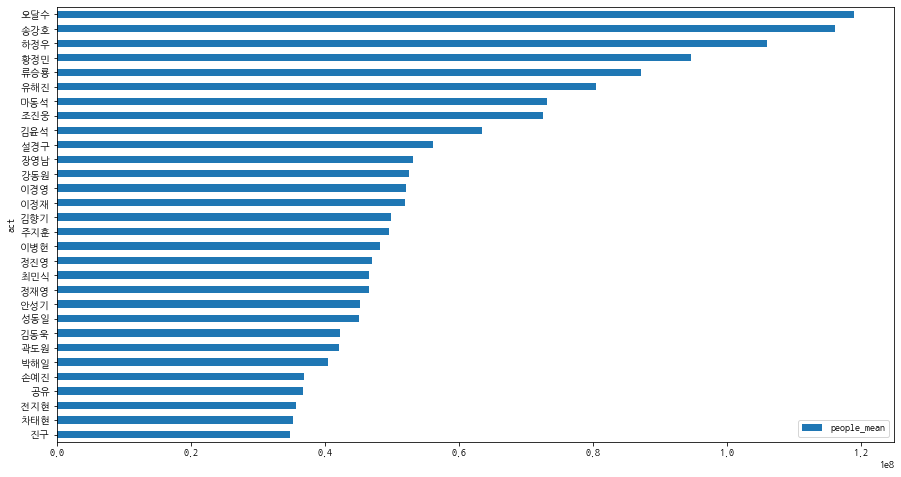

In [358]:
plt.rcParams["figure.figsize"] = [15, 8]
act_peo_df.index = act_peo_df.act
act_peo_df.drop('act',axis=1)
act_peo_df.sort_values('people_mean').tail(30).plot.barh()